# Decision Trees Exercise
This exercise will guide you in implementing the Decision Trees. 


## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume **one to two lines** only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* There are commented markdown cells that have crumbs. Do not delete them or separate them from the cell originally directly below it.  
* You may add new cells for "scrap work" as long as the crumbs are not separated from the cell below it.
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [333]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decision tree classifier

For this first section, we will create a decision tree to predict the flower species from the iris dataset.

**Dataset:**
The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class (Species):
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

We will be using pandas to import our csv data into Python

In [334]:
import pandas as pd

Load the csv file into a pandas dataframe

In [335]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [336]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Extract the feature columns for X, and the label column for y

In [337]:
# write code here
X = iris.drop("species", axis=1)
y = iris['species']

In [338]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [339]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Split the dataset into train and test sets. Set the `random_state` to `0`. 

In [340]:
# write code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [341]:
y_train.value_counts()

species
virginica     39
setosa        34
versicolor    32
Name: count, dtype: int64

In [342]:
y_test.value_counts()

species
versicolor    18
setosa        16
virginica     11
Name: count, dtype: int64

## Building our classification tree
We will be using sklearn's `DecisionTreeClassifier`. Create a classification tree here but do not make any predictions in this cell yet.

In [343]:
from sklearn.tree import DecisionTreeClassifier

# write code here
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

From our lecture, we learned that trees can overfit by creating a separate node for every single configuration of feature values possible. Let's see if this is true by running predictions on our training set.

Run predictions on the train set, get the accuracy

In [344]:
# write code here
predictions_train = dtc.predict(X_train)

We will be computing for the accuracy multiple times in this notebook, so let's create a function for this.

`compute_accuracy()` will compute for the accuracy given two vectors of equal length

__Inputs:__
- `predictions`: A numpy array of shape `(N,)` consisting of `N` samples representing the predicted values
- `actual`: A numpy array of shape `(N,)` consisting of `N` samples representing the actual (target) values

__Outputs:__
- `accuracy`: A scalar representing the percentage of elements where `predictions` and `actual` match out of the total number of elements

In [345]:
def compute_accuracy(predictions, actual):
    acc = sum(predictions == actual) / len(predictions)
    return acc

In [346]:
print("Training accuracy: ", compute_accuracy(y_train, predictions_train),"%")

Training accuracy:  1.0 %


**Sanity Check:** A decision tree without regularization should be able to achieve 100% accuracy on the training set.

If not, you might be seeing a 99.9999% accuracy. But if you look at the predictions, you will see that it got all the train set predicted correctly.

Let's see how our model does with the test set. Run predictions on the test set, and get the accuracy

In [347]:
# write code here
predictions = dtc.predict(X_test)

In [348]:
print("Testing accuracy: ", compute_accuracy(y_test, predictions),"%")

Testing accuracy:  0.9777777777777777 %


<span style="color:red;">Question 8-1: What could possibly contribute to the difference in the train and test error?</span>

> Overfitting the train data

## Visualizing the tree

You can also read more about the following code here: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py 

The code just reconstructs the tree given the model/estimator.

In [349]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [350]:
describe_tree(dtc)

The binary tree structure has 13 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.75 else to node 2.
	node=1 is a leaf node, values: [[34.  0.  0.]].
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 8.
		node=3 is a split node: go to node 4 if X[:, 3] <= 1.6500000357627869 else to node 5.
			node=4 is a leaf node, values: [[ 0. 30.  0.]].
			node=5 is a split node: go to node 6 if X[:, 1] <= 3.100000023841858 else to node 7.
				node=6 is a leaf node, values: [[0. 0. 3.]].
				node=7 is a leaf node, values: [[0. 1. 0.]].
		node=8 is a split node: go to node 9 if X[:, 3] <= 1.75 else to node 12.
			node=9 is a split node: go to node 10 if X[:, 3] <= 1.6500000357627869 else to node 11.
				node=10 is a leaf node, values: [[0. 0. 3.]].
				node=11 is a leaf node, values: [[0. 1. 0.]].
			node=12 is a leaf node, values: [[ 0.  0. 33.]].


In [351]:
print("Classes learned by the Decision Tree:", dtc.classes_)

Classes learned by the Decision Tree: ['setosa' 'versicolor' 'virginica']


<span style="color:red;">Question 8-2: How many nodes are present in the tree above?</span>

> 13

<span style="color:red;">Question #3: We have the following features: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`. Which feature does the root node look at?</span>

> petal_width

<span style="color:red;">Question 8-4: If a test data gets categorized to node=12, which among these classes will it fall under: setosa, versicolor, or virginica?</span>

> virginica

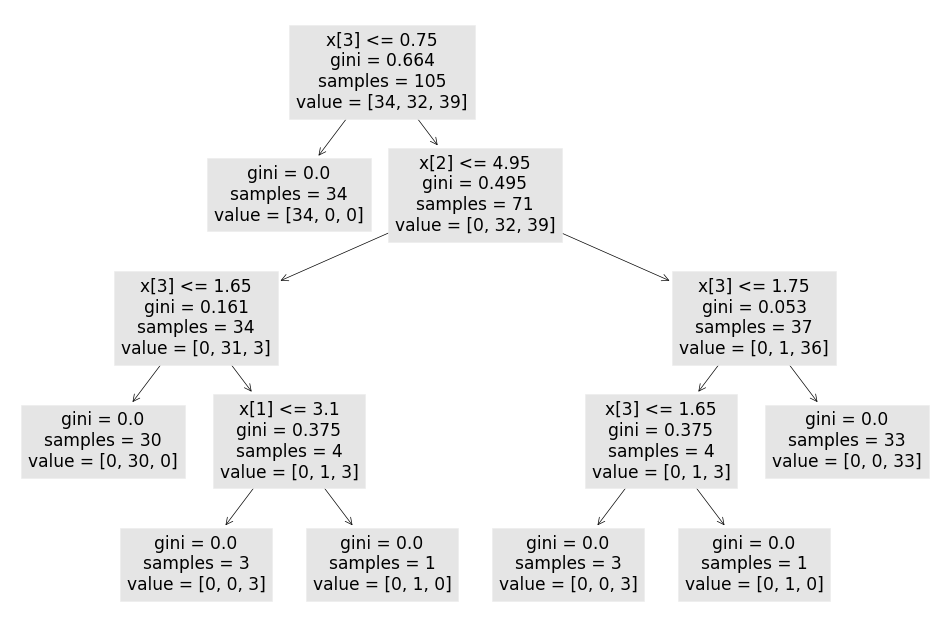

In [352]:
from sklearn import tree

tree.plot_tree(dtc)
plt.show()

In [353]:
tree.export_graphviz(dtc,out_file='tree.dot')                

To view a graph of the tree, open `tree.dot` and paste its contents in <a src="http://webgraphviz.com/">webgraphviz.com</a>. You'll end up with a similar tree like the one below:

<img src="https://i.imgur.com/E7UJJZk.png" width="300px">

_______

# Decision trees regressor
For regression, we will generate a dummy dataset following a sin curve so we can visualize the results. This will also allow us to visualize how our model does regularization.

## Generating our dataset

In [354]:
n_samples = 300
np.random.seed(1)
X = np.expand_dims(np.random.uniform(-np.pi,np.pi, n_samples),1)
y = np.sin(2*X) + np.random.randn(n_samples,1)*0.3

num_items = X.shape[0]
randIdx = np.arange(num_items)

Split our dataset. Set the `random_seed` to `42` so your results matches the sanity check below.

In [355]:
# write code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (210, 1)
y_train shape :  (210, 1)
X_test shape :  (90, 1)
y_test shape :  (90, 1)


We will need our `y` as vectors later on, so let's reshape/squeeze that extra dimension off.

In [356]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

### Visualizing the dataset
To help you visualize our data, it looks like this:

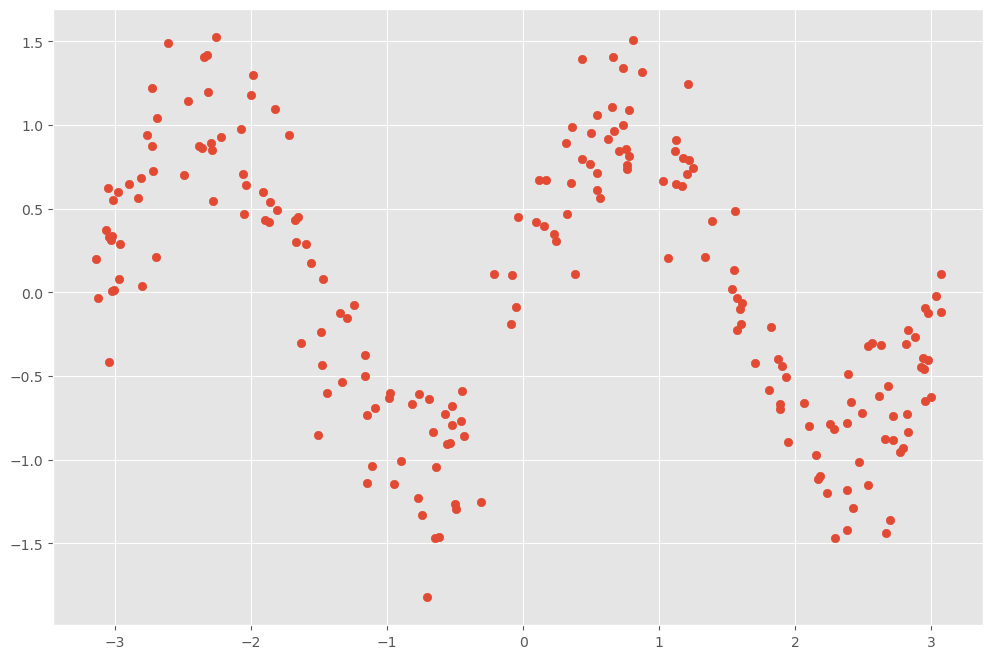

In [357]:
plt.scatter(X_train,y_train)

## Building our regression tree
Here we will use `DecisionTreeRegressor`. 

In [358]:
from sklearn.tree import DecisionTreeRegressor

Build our classifier, and make it run predictions on our train data. Use the default hyperparameters for our regressor.

In [359]:
# write code here
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

train_predictions = dtr.predict(X_train)
train_predictions

array([-0.29978384,  0.67020646, -0.92796708, -0.59885426, -0.79529062,
       -0.67642634, -0.66684031,  0.21284679, -0.40099306,  0.42144355,
       -1.11614546,  1.06132595, -1.2944924 ,  0.72385342, -1.0401354 ,
       -0.95405224,  0.65591357,  1.52452499,  1.09674298, -1.14883167,
        0.11092977, -0.18827533, -0.58920585,  0.91325592,  0.84299411,
       -0.09915001,  0.94187571,  0.7997997 ,  0.30029963,  1.10638498,
        0.68477285,  0.9527776 , -0.85331156,  0.10543296,  0.13344489,
       -0.12114744,  0.31074939,  0.30766294, -0.73845893, -0.6004263 ,
       -1.82172958, -0.88198599,  0.96199216, -0.87561176, -0.769363  ,
       -0.73200953,  0.02225589,  0.20671383,  0.87583293,  0.19974336,
       -0.06603215,  0.87503571, -0.43543892,  0.5502688 , -0.8335855 ,
       -0.0318769 , -0.97246382, -1.04340066, -1.1813199 , -1.14509081,
       -0.90575447, -1.35777851, -0.89658518, -0.64806539, -0.48988534,
        0.04117183,  1.19948072,  0.34673598,  0.99981704, -0.71

Calculate for the mean squared error and the mean absolute error. We will make a function for both of these because will be computing for the `mse` and `mae` multiple times in the notebook.

___

`compute_mse()` will compute for the mean squared error given two vectors of equal length

__Inputs:__
- `predictions`: A numpy array of shape `(N,)` consisting of `N` samples representing the predicted values
- `actual`: A numpy array of shape `(N,)` consisting of `N` samples representing the actual (target) values

__Outputs:__
- `mse`: A scalar representing the mean squared error between `predictions` and `actual`

___

`compute_mae()` will compute for the mean absolute error given two vectors of equal length

__Inputs:__
- `predictions`: A numpy array of shape `(N,)` consisting of `N` samples representing the predicted values
- `actual`: A numpy array of shape `(N,)` consisting of `N` samples representing the actual (target) values

__Outputs:__
- `mae`: A scalar representing the mean absolute error between `predictions` and `actual`

In [360]:
def compute_mse(predictions, actual):
    # write code here
    mse = np.mean((predictions - actual) ** 2)
    return mse

def compute_mae(predictions, actual):
    # write code here
    mae = np.mean(np.abs(predictions - actual))
    return mae

In [361]:
mse = compute_mse(train_predictions, y_train)
print("Mean Squared Error :", mse)

mae = compute_mae(train_predictions, y_train)
print("Absolute Relative Error :", mae)

Mean Squared Error : 0.0
Absolute Relative Error : 0.0


## Visualizing our predictions

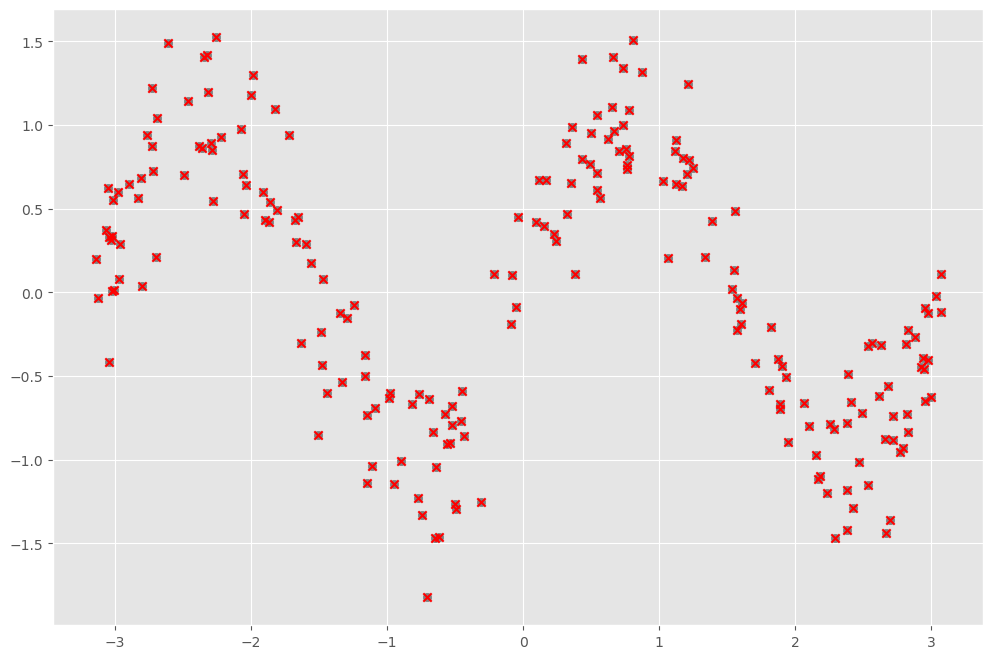

In [362]:
plt.scatter(X_train, y_train, color="gray")
plt.scatter(X_train, train_predictions, color="red", marker="x")

<span style="color:red;">Question 8-5: How can you describe the accuracy of the model on the training data?</span>

> Overfitting

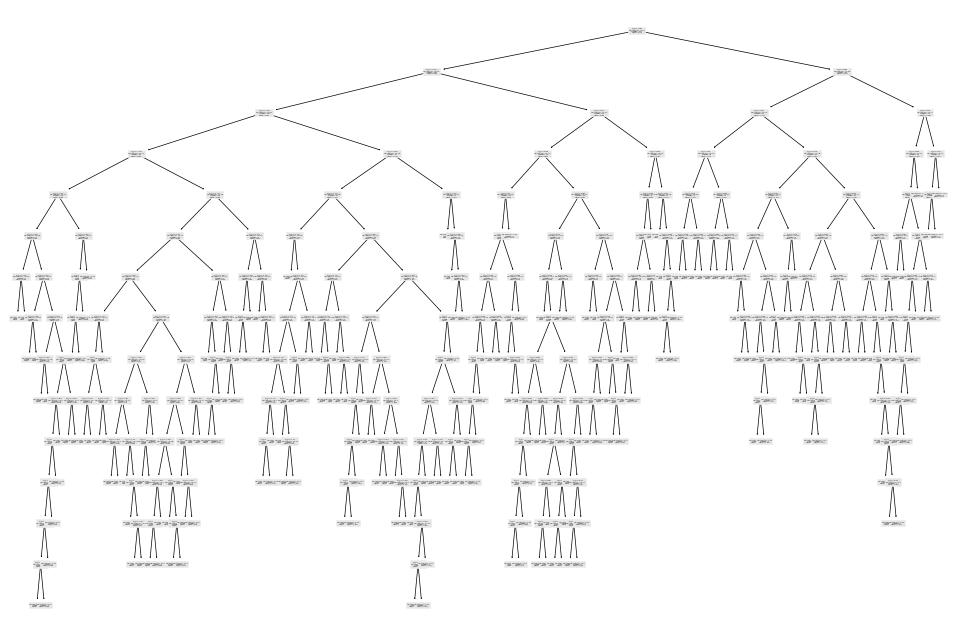

In [363]:
tree.plot_tree(dtr)
plt.show()

Now, make it run predictions on our test data

In [364]:
# write code here
test_predictions = dtr.predict(X_test)

test_predictions

array([ 1.3182865 ,  0.20671383,  1.39441471,  0.30766294, -0.12029387,
        0.9527776 ,  0.62504808,  0.11128238,  1.49192623,  0.02225589,
        0.56613591,  0.92672107, -0.65872592, -1.24999114, -0.09915001,
       -0.68954318,  0.02225589, -0.44295369,  0.11092977,  0.33793844,
       -0.221795  ,  0.74294275, -0.3158225 ,  0.19974336, -0.29978384,
       -0.12029387, -0.31724624,  0.72385342,  0.9527776 , -0.85600724,
        0.98800292,  0.92672107,  0.34673598, -1.41821889,  0.42144355,
        0.86532463, -0.59885426,  0.87503571, -0.29978384, -0.50306016,
        0.76989591, -0.55754845,  0.67020646,  0.69961454, -1.14509081,
       -0.89900718, -0.08747194, -0.31724624,  0.54639094,  0.89328584,
        1.51063118,  0.56195959, -0.50306016,  0.9743257 ,  1.49192623,
       -0.62873305,  0.76989591, -1.24999114,  0.02225589, -0.71837822,
       -0.39670311,  0.74294275,  1.29736795, -0.50306016, -1.32833309,
        0.69961454, -0.49784528,  0.76989591,  0.76989591,  0.59

In [365]:
mse = compute_mse(test_predictions, y_test)
print("Mean Squared Error :", mse)

mae = compute_mae(test_predictions, y_test)
print("Absolute Relative Error :", mae)

Mean Squared Error : 0.2609638219530092
Absolute Relative Error : 0.41485681276469794


**Sanity Check:** You should see values like the following:
```
Mean Squared Error : 0.260963821953
Absolute Relative Error : 0.414856812765
```

Visualize how the our predictions fare against the actual results

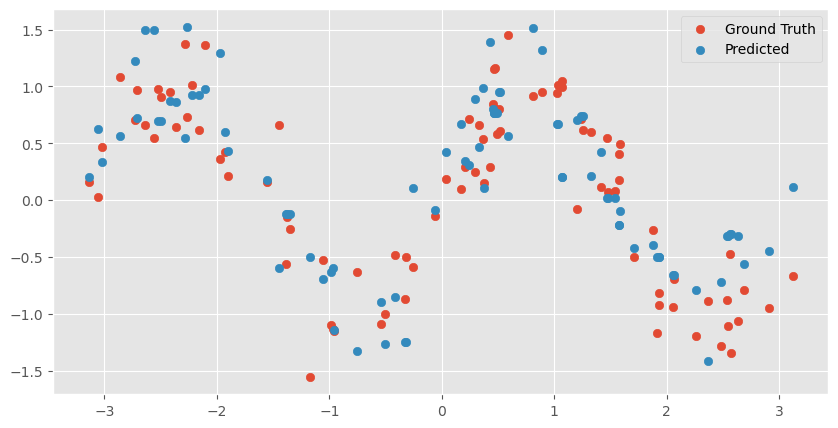

In [366]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Ground Truth')
plt.scatter(X_test, test_predictions, label='Predicted')
plt.legend(loc='upper right')

# Regularizing decision trees
In the absence of regularization, the decision tree will memorize the training set and achieve 0% error. While this is good in terms of bias, it may not generalize well to never before seen data (variance problem)

Let's modify our model to include three ways of regularization:
- **Minimum samples split**: If the remaining samples are less than the specifed value then we stop splitting and make it a leaf node
- **Max depth**: Restricts the maximum depth of the trees
- **Minimum impurity decrease**: If the impurity decrease is less than the specified value then we stop splitting and make it a leaf node.
- **Max leaf node**: If the number of leaf nodes is met then we stop splitting.

You will use this test set for the visualization below, so use this as your test set for the loop below. It follows the same sin function as our training data.

In [367]:
X_test_vis = np.expand_dims(np.linspace(-np.pi,np.pi,300),-1)

In [368]:
y_test_vis = np.sin(2*X_test_vis) + np.random.randn(n_samples,1)*0.3

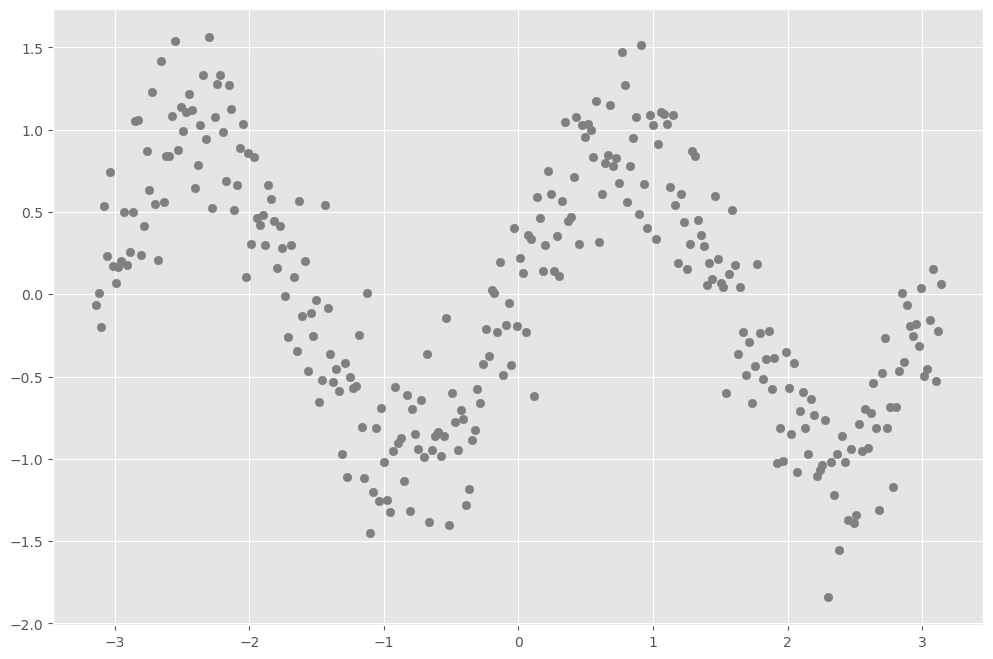

In [369]:
plt.scatter(X_test_vis,y_test_vis, color="gray")

## Regularizing with minimum samples split

Let's apply different minimum samples splits to your model. Let's try it with these values:

In [370]:
min_samples_split_vals = [2, 4, 6, 10, 15, 20]

To make the following code work, __you have to do the following per iteration__:
1. Create a decision tree regressor following the minimum samples split value for that iteration
1. Fitthe model to your train data and the training labels/outputs
1. Get the trained model to make predictions on `X_test_vis`
1. Plot `X_test_vis` (x-coordinate) relative to the predictions (y-coordinate) made by the model

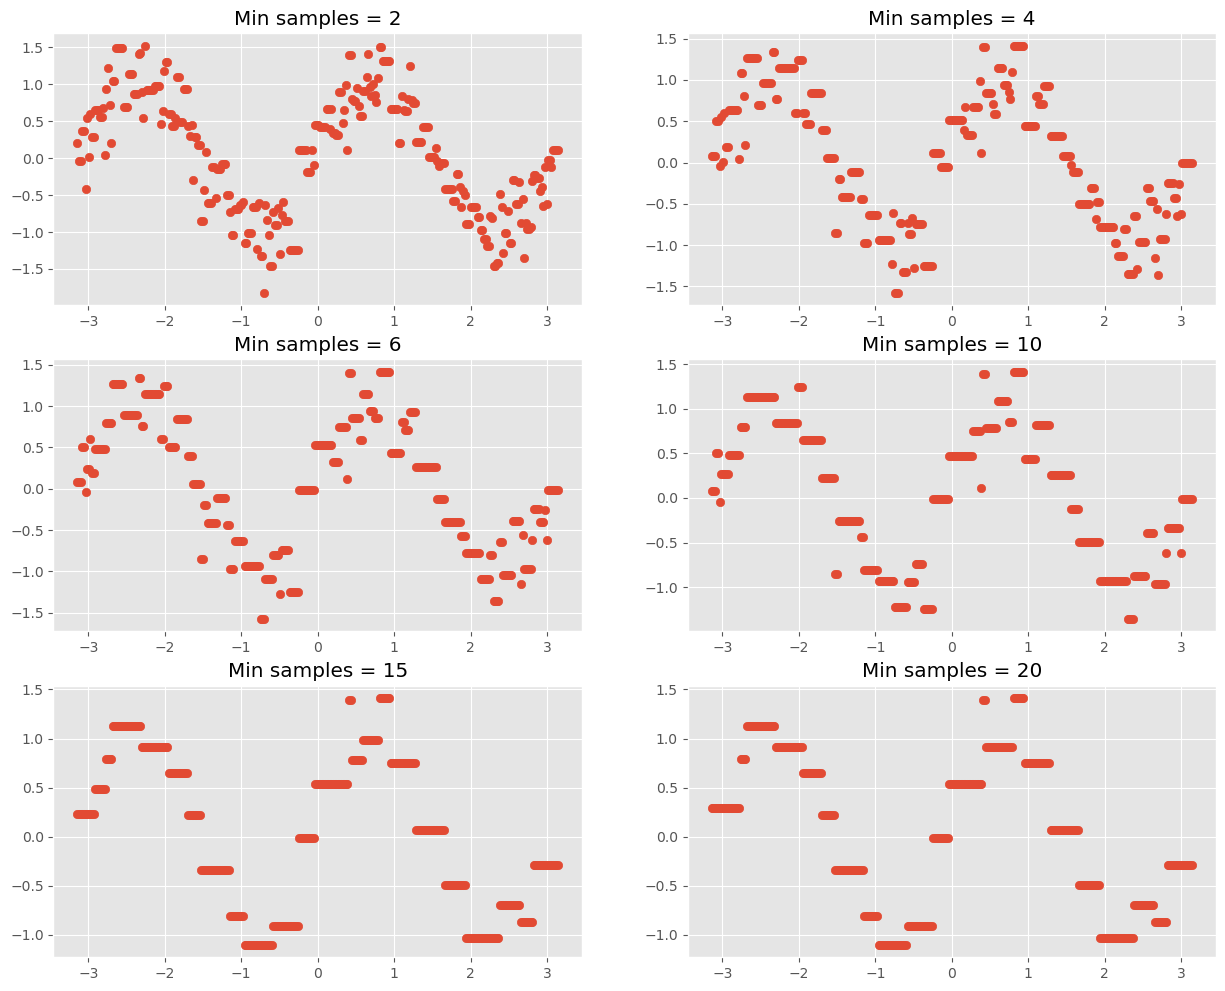

In [371]:
# Some plotting stuff
plt_ctr = 1
plt.figure(figsize=(15,12))

for val in min_samples_split_vals:
    # Write code here
    dtr = DecisionTreeRegressor(min_samples_split=val)
    dtr.fit(X_train, y_train)

    plt.subplot(3,2,plt_ctr)
    
    # Write code here
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions)
    
    plt.title("Min samples = "+ str(val))
    
    plt_ctr += 1

**Sanity Check:**
Your graph should like the one below:
<img src="https://imgur.com/Wibqyx4.png" width="400px">

<br>


As we increase the number of minimum samples, the predictions for close/nearby x values tend to get the same y-value. 'Minimum samples' refers to the minimum number of instances/samples in a node needed to split it. Increasing the number of samples tells the model to stop splitting early on.

<span style="color:red;">Question 8-6: For this particular dataset, how many nodes can we expect the final tree to have if we set the minimum sample split to `10,000?`</span>

> 1

## Regularizing with maximum depth

Let's apply different maximum depths to your model. Let's try it with these values:

In [372]:
max_depth_vals = [2, 4, 6, 10, 15, 20]

To make the following code work, __you have to do the following per iteration__:
1. Create a decision tree regressor following the maximum depth value for that iteration
1. Fit the model to your train data and the training labels/outputs
1. Get the trained model to make predictions on `X_test_vis`
1. Plot `X_test_vis` (x-coordinate) relative to the predictions (y-coordinate) made by the model

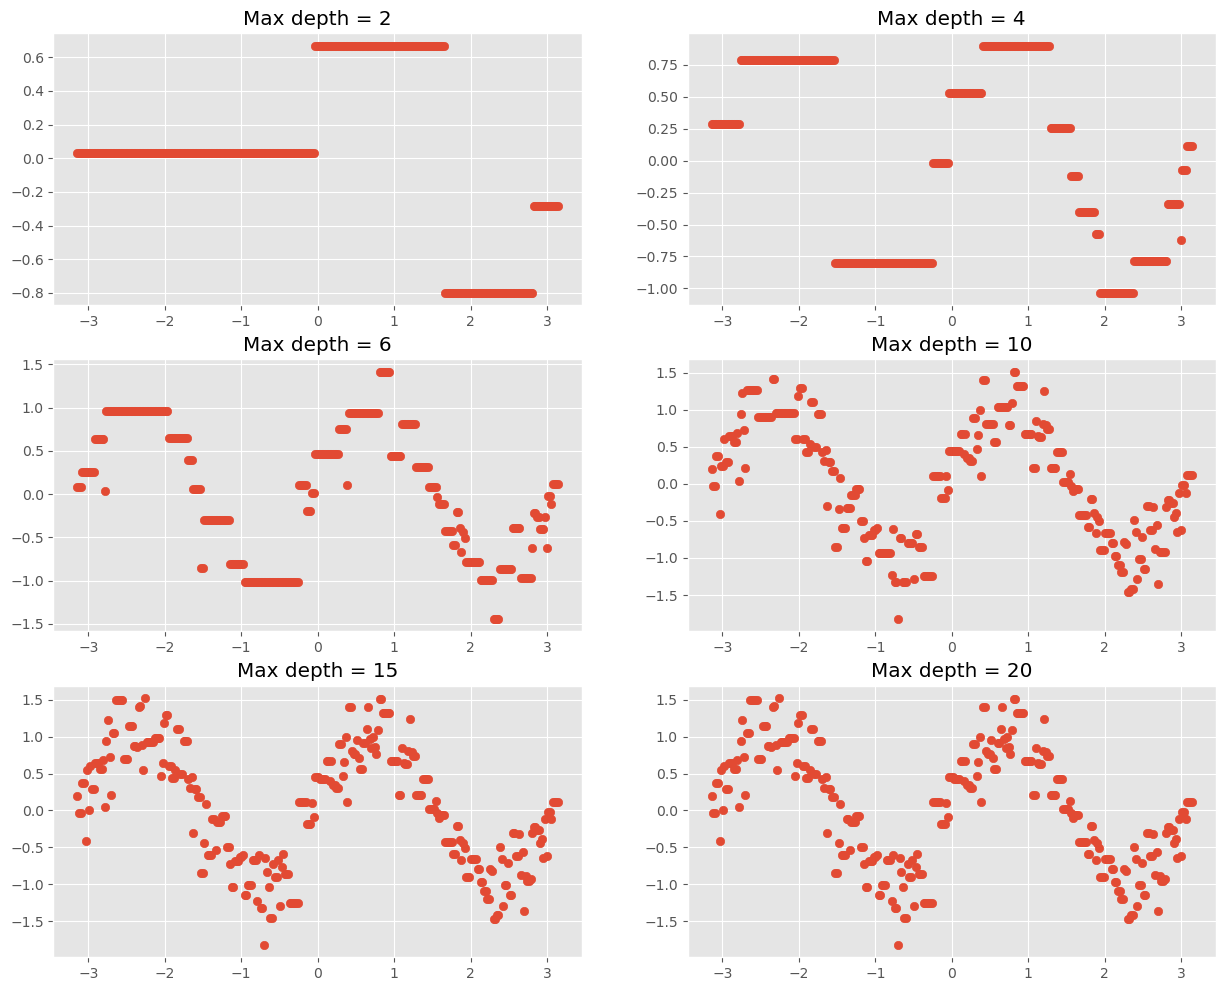

In [373]:
plt_ctr = 1
plt.figure(figsize=(15,12))
for val in max_depth_vals:
    # Write code here
    dtr = DecisionTreeRegressor(max_depth=val)
    dtr.fit(X_train, y_train)
    
    plt.subplot(3,2,plt_ctr)
    
    # Write code here
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions)
    
    plt.title("Max depth = "+ str(val))
    
    plt_ctr += 1

**Sanity Check:** The higher the max depth, the more unique labels you will get. (Inverse of minimum spits)

As we increase the maximum depth, the predictions for close/nearby x values tend to get the different y-values. An increase in maximum depth tells the model it's okay to keep splitting more nodes. Having a small max depth tells the model to stop after it reachers the specified depth/height.

## Regularizing with minimum impurity decrease

Let's apply different minimum impurity decrease to your model. Let's try it with these values:

In [374]:
min_impurity_vals = [0, 0.0001, 0.001, 0.01, 0.1, 1]

To make the following code work, __you have to do the following per iteration__:
1. Create a decision tree regressor following the minimum impurity decrease value for that iteration
1. Fit the model to your train data and the training labels/outputs
1. Get the trained model to make predictions on `X_test_vis`
1. Plot `X_test_vis` (x-coordinate) relative to the predictions (y-coordinate) made by the model

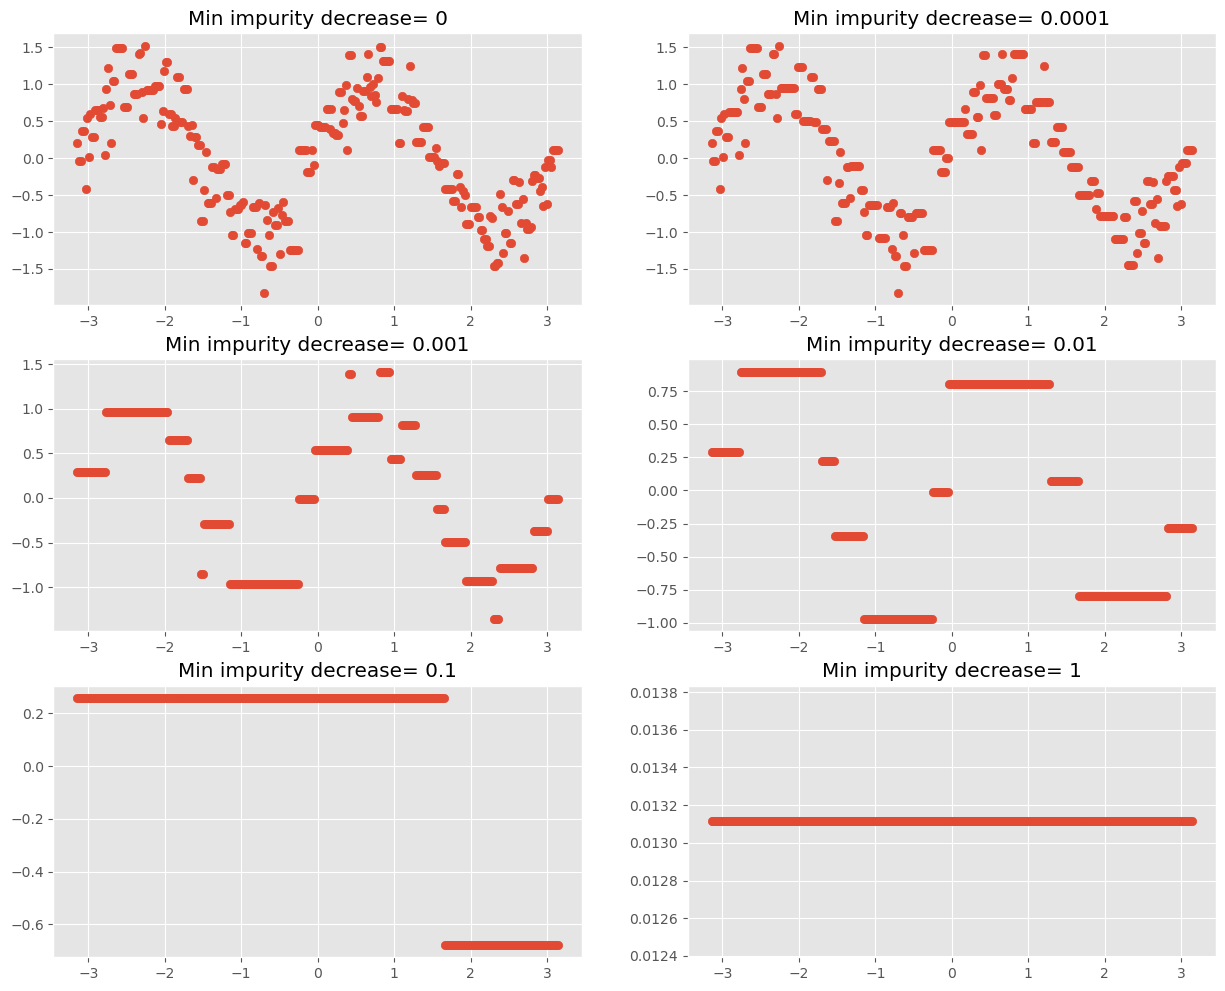

In [375]:
plt_ctr = 1
plt.figure(figsize=(15,12))

for val in min_impurity_vals:
    # Write code here
    dtr = DecisionTreeRegressor(min_impurity_decrease=val)
    dtr.fit(X_train, y_train)
    
    plt.subplot(3,2,plt_ctr)
    
    # Write code here
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions)
    
    plt.title("Min impurity decrease= "+ str(val))
    
    plt_ctr += 1

**Sanity Check:** You should see an output with a similar pattern as minimum samples split.

As we increase the minimum impurity decrease, the predictions for close/nearby x values tend to get the same y-value. Having a lower impurity decrease tells the model to reach this level of minimum impurity before a node stop branching out. So **having a lower impurity requires the model to keep on splitting until every node achieves the minimum impurity**. With an imposed high impurity decrease, the model can stop splitting if it does not lower the impurity in the next split.

## Regularizing with max leaf nodes 

Let's apply different max leaf nodes to your model. Let's try it with these values:

In [376]:
max_leaf_vals = [3, 5, 10, 20, 50, 100]

To make the following code work, __you have to do the following per iteration__:
1. Create a decision tree regressor following the max leaf nodes value for that iteration
1. Fit the model to your train data and the training labels/outputs
1. Get the trained model to make predictions on `X_test_vis`
1. Plot `X_test_vis` (x-coordinate) relative to the predictions (y-coordinate) made by the model

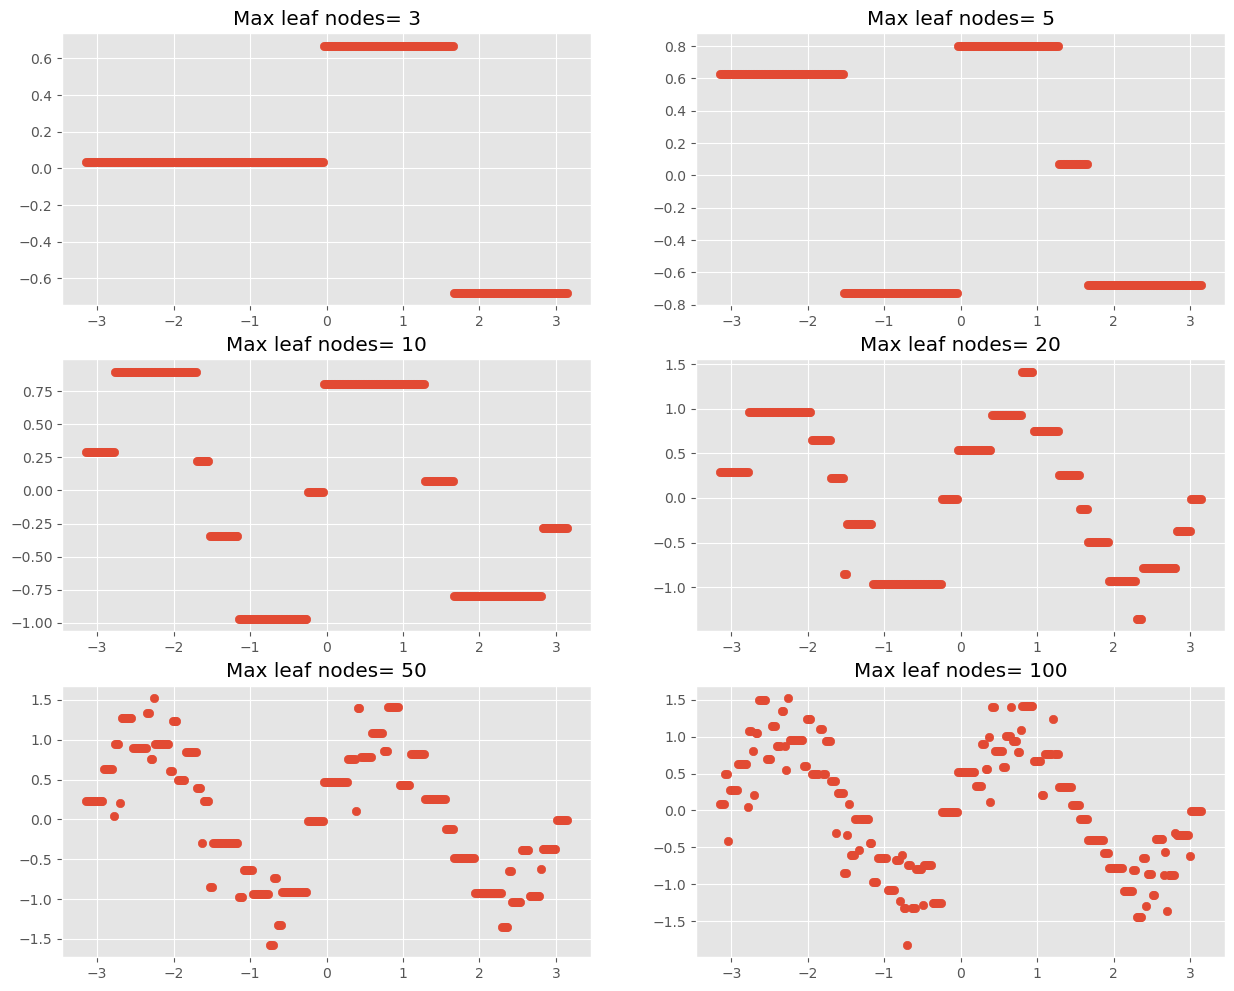

In [377]:
plt_ctr = 1
plt.figure(figsize=(15,12))

for val in max_leaf_vals:
    # Write code here
    dtr = DecisionTreeRegressor(max_leaf_nodes=val)
    dtr.fit(X_train, y_train)
    
    plt.subplot(3,2,plt_ctr)
    
    # Write code here
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions)
    
    plt.title("Max leaf nodes= "+ str(val))
    
    plt_ctr += 1

**Sanity Check:** You should see an output with a similar pattern as max depth.

As we increase the max leaf nodes, the predictions for close/nearby x values tend to get the different y-values. Why? Increasing the max leaf nodes allow our model to split data into their own value node, while having a small max leaf nodes forces our model to stop splitting early.

# Hyperparameter tuning

Now that we have learned the hyperparameters we can control in our tree model, let's try to find out the best hyperparameters for our model using cross validation. We will also use randomized search to aid in hyperparameter tuning.

In [378]:
from sklearn.model_selection import RandomizedSearchCV

## Tuning a decision tree regressor
Note that we will be using the same sin wave data for the following section. 

We already separated our training data (`X_train`, `y_train`) from our hold-out test set (`X_test`, `y_test`) so we can go straight to modelling.

### Training our model
Let's define our base model/estimator. Since this is a regression task, we should make a `DecisionTreeRegressor`.

In [379]:
# write code here
dtr = DecisionTreeRegressor()

In [380]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

For the following section, we will define our hyperparameters. For now, set the following hyperparameter choices:

__Hyperparameters__:
- minimum impurity decrease could be 0.001, 0.01, 0.05, 0.1, 0.3, 0.5
- max depth could be 5, 10, 20, 30
- minimum samples split could be 2, 4, 6, 10, 15, 20
- max leaf nodes could be 3, 5, 10, 20, 50, 100

In [381]:
# write code here
hyperparameters = [
    {
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

Create our `RandomizedSearchCV` object, and give it our base estimator and hyperparameters. Set the number of estimators to `50`, and the number of cross validation folds to `5`. Set the `random_state` to `42`.

In [382]:
# write code here
rsr = RandomizedSearchCV(
    estimator=dtr,
    param_distributions=hyperparameters,
    n_iter=50,
    cv=5, 
    random_state=42,
)

Train our models on our training data

In [383]:
# write code here
rsr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   param_distributions=[{'max_depth': [5, 10, 20, 30],
                                         'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                            100],
                                         'min_impurity_decrease': [0.001, 0.01,
                                                                   0.05, 0.1,
                                                                   0.3, 0.5],
                                         'min_samples_split': [2, 4, 6, 10, 15,
                                                               20]}],
                   random_state=42)

Find the best hyperparameters found by our randomized search

In [384]:
# write code here
print("Best parameters:", rsr.best_params_)

Best parameters: {'min_samples_split': 20, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 50, 'max_depth': 20}


Now, we can make a new estimator with the best hyperparameters.

In [385]:
# write code here
dtr = rsr.best_estimator_

Train the estimator on our data:

In [386]:
# write code here
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50,
                      min_impurity_decrease=0.001, min_samples_split=20)

And, get the predictions and the mean squared error

In [387]:
# write code here
predictions = dtr.predict(X_train)

print("MSE: ", compute_mse(y_train, predictions))
print("MAE: ", compute_mae(y_train, predictions))

MSE:  0.07287968240715635
MAE:  0.21720769533385637


<span style="color:red;">Question 8-7: What is the training mean squared error of our best model? Round off to four decimal places.</span>

> 0.0729

<span style="color:red;">Question 8-8: What is the training mean absolute error of our best model? Round off to four decimal places.</span>

> 0.2172

__Note:__ We could directly use `rsr` to make predictions as it refits to our provided data by default.

**Visualizing how our model performs on the training data**

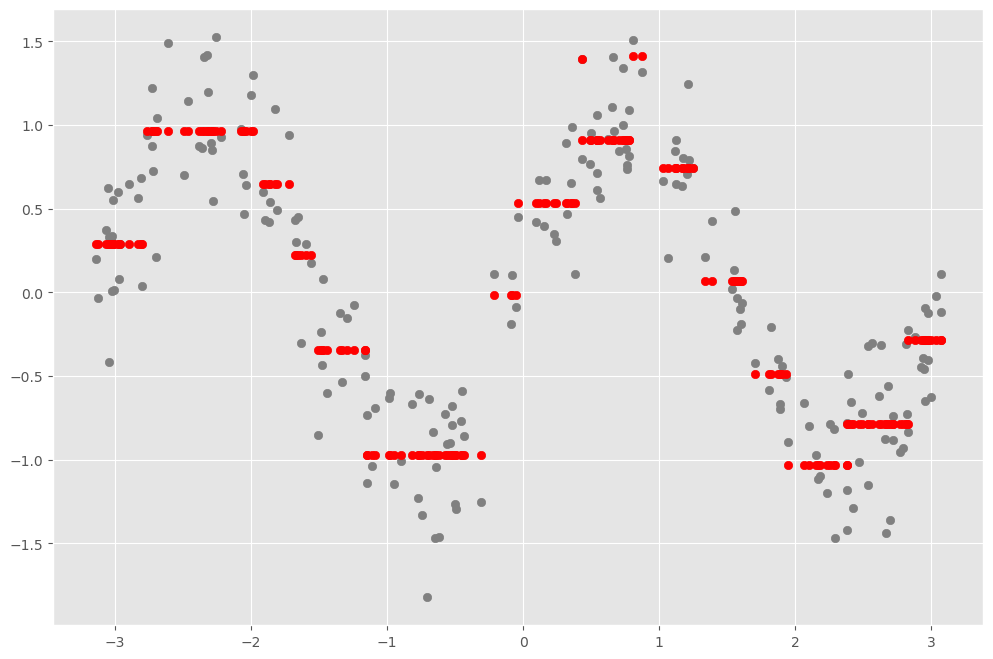

In [388]:
plt.scatter(X_train, y_train, color="gray")
plt.scatter(X_train, predictions, color="red")

### Testing phase

Now, let's test our model on our test data. If we tuned our models correctly, we should be able to get a comparable result.

In [389]:
# write code here
predictions = dtr.predict(X_test)

print("MSE: ", compute_mse(y_test, predictions))
print("MAE: ", compute_mae(y_test, predictions))

MSE:  0.14689992394675497
MAE:  0.29875019754298676


**Sanity check:** You should get the following results:
```
MSE:  0.14689992394675497
MAE:  0.29875019754298676
```

**Visualizing how our model performs on the test data**

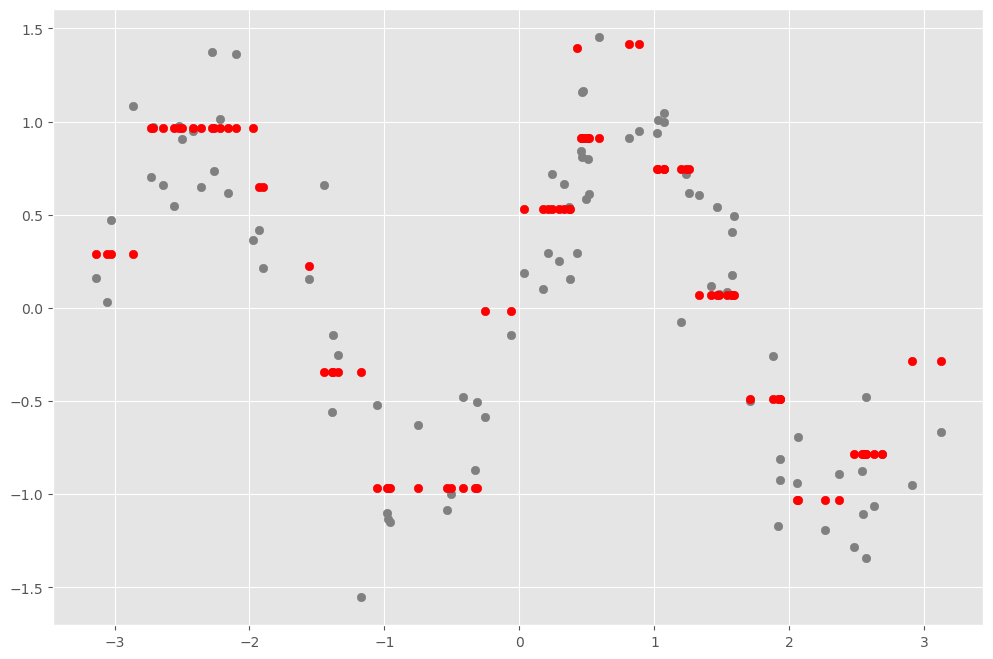

In [390]:
plt.scatter(X_test, y_test, color="gray")
plt.scatter(X_test, predictions, color="red")

## Tuning a decision tree classifier
We will bring back the iris dataset from before to train our decision tree.

### Preparing our data
We get our `X` and separate it from our target output `y`

In [391]:
# write code here
X = iris.drop("species", axis=1)
y = iris['species']

### Separating out our hold-out test set
We will use the test set later to check how well our model is doing after we perform hyperparameter tuning. For this split, make sure we stratify our data based on the species. Set the `random_state` to `42`.

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

To know if the stratification worked, the following code should show an equal number of counts per class:

In [393]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

Training data label counts:
[['setosa' 'versicolor' 'virginica']
 [35 35 35]]


__Sanity check:__ You should see the following
```
Training data label counts:
[[ 0  1  2]
 [35 35 35]]
```

In [394]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test data label counts:")
print(np.array([unique, counts]))

Test data label counts:
[['setosa' 'versicolor' 'virginica']
 [15 15 15]]


__Sanity check:__ You should see the following
```
Training data label counts:
[[ 0  1  2]
 [15 15 15]]
```

### Training our model
Since the task is framed as a classification problem, we will create a `DecisionTreeClassifier` as our estimator

In [395]:
# write code here
dtc = DecisionTreeClassifier()

In [396]:
dtc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

For the following code, we will define our hyperparameters. For now, set the following hyperparameter choices:

__Hyperparameters__:
- criterion could either be `gini` or `entropy`
- max depth could be 5, 10, 20, 30
- minimum samples split could be 2, 4, 6, 10, 15, 20
- max leaf nodes could be 3, 5, 10, 20, 50, 100

In [397]:
# write code here
hyperparameters = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 4, 6, 10, 15, 20],
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100]
    }
]

Create our `RandomizedSearchCV` object, and give it our base estimator and hyperparameters. Set the number of estimators to `50`, and the number of cross validation folds to `5`. Set the `random_state` to `42`.

In [398]:
# write code here
rsc_iris = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=hyperparameters,
    n_iter=50,
    cv=5, 
    random_state=42,
)

Fit our models to our training data

In [399]:
# write code here
rsc_iris.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 10, 20, 30],
                                         'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                            100],
                                         'min_samples_split': [2, 4, 6, 10, 15,
                                                               20]}],
                   random_state=42)

Let's get the best parameters found in our hyperparameter search

In [400]:
# write code here
rsc_iris.best_params_

{'min_samples_split': 10,
 'max_leaf_nodes': 5,
 'max_depth': 10,
 'criterion': 'gini'}

We could also see the results of each model (and their hyperparameters) using the following code:

In [401]:
rsc_iris.cv_results_

{'mean_fit_time': array([0.00159979, 0.00140185, 0.00210495, 0.00160041, 0.00139909,
        0.00139928, 0.00159998, 0.00120077, 0.00119991, 0.00140123,
        0.00150213, 0.00140076, 0.00140119, 0.00139971, 0.00100017,
        0.00120049, 0.00099993, 0.00140023, 0.00100245, 0.00139909,
        0.00159903, 0.00140138, 0.00119982, 0.00119996, 0.00140181,
        0.0013042 , 0.00099945, 0.00120006, 0.0012002 , 0.00159864,
        0.00118933, 0.00159984, 0.00119925, 0.00130196, 0.00139999,
        0.00100031, 0.00139961, 0.00139909, 0.00139794, 0.00140371,
        0.00170112, 0.00140076, 0.00180163, 0.00140066, 0.00139971,
        0.00160131, 0.00119934, 0.00180278, 0.00130048, 0.00120134]),
 'std_fit_time': array([4.89693862e-04, 4.91673992e-04, 2.10227840e-04, 4.90302312e-04,
        4.89459916e-04, 4.89202274e-04, 4.90430562e-04, 4.01687650e-04,
        4.00448498e-04, 4.91317847e-04, 4.48534779e-04, 4.90138486e-04,
        4.89201926e-04, 4.90213516e-04, 9.41677936e-07, 4.01353907e-0

To easily see the results, let's view it as a `DataFrame`

In [402]:
# this code will help the model not truncate the hyperparameters section
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rsc_iris.cv_results_)
rsc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001600,4.896939e-04,0.000800,3.998374e-04,10,5,10,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1
1,0.001402,4.916740e-04,0.001399,4.896500e-04,4,10,5,entropy,"{'min_samples_split': 4, 'max_leaf_nodes': 10, 'max_depth': 5, 'criterion': 'entropy'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1
2,0.002105,2.102278e-04,0.002000,6.334700e-04,15,3,30,entropy,"{'min_samples_split': 15, 'max_leaf_nodes': 3, 'max_depth': 30, 'criterion': 'entropy'}",0.952381,0.952381,0.952381,0.904762,0.952381,0.942857,0.019048,39
3,0.001600,4.903023e-04,0.000999,1.761073e-06,2,5,10,gini,"{'min_samples_split': 2, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1
4,0.001399,4.894599e-04,0.001001,3.230550e-06,4,3,10,entropy,"{'min_samples_split': 4, 'max_leaf_nodes': 3, 'max_depth': 10, 'criterion': 'entropy'}",0.952381,0.952381,0.952381,0.904762,0.952381,0.942857,0.019048,39
5,0.001399,4.892023e-04,0.000800,4.001647e-04,10,5,5,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 5, 'criterion': 'gini'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1
6,0.001600,4.904306e-04,0.000801,4.002850e-04,15,5,10,gini,"{'min_samples_split': 15, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1
7,0.001201,4.016877e-04,0.001199,4.003568e-04,15,50,5,entropy,"{'min_samples_split': 15, 'max_leaf_nodes': 50, 'max_depth': 5, 'criterion': 'entropy'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1
8,0.001200,4.004485e-04,0.001000,7.072638e-07,20,3,20,gini,"{'min_samples_split': 20, 'max_leaf_nodes': 3, 'max_depth': 20, 'criterion': 'gini'}",0.952381,0.952381,0.952381,0.904762,0.952381,0.942857,0.019048,39
9,0.001401,4.913178e-04,0.000800,4.002131e-04,10,10,10,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 10, 'max_depth': 10, 'criterion': 'entropy'}",0.952381,0.952381,1.000000,0.904762,0.952381,0.952381,0.030117,1


Get the randomized search's best estimator index to quickly get the entry of the best performing model.

In [403]:
# write code here
best_index = rsc_iris.best_index_
best_index

0

In [404]:
rsc_results.loc[best_index]

mean_fit_time                                                                                            0.0016
std_fit_time                                                                                            0.00049
mean_score_time                                                                                          0.0008
std_score_time                                                                                           0.0004
param_min_samples_split                                                                                      10
param_max_leaf_nodes                                                                                          5
param_max_depth                                                                                              10
param_criterion                                                                                            gini
params                     {'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 

Get the best accuracy achieved by a best model  

In [405]:
# write code here
best_acc = rsc_iris.best_score_
print(best_acc)

0.9523809523809523


<span style="color:red;">Question 8-9: What is the accuracy achieved by our best estimator? Round off to four decimal places.</span>

> 0.9524

We can also get the `best_estimator_`

In [406]:
rsc_iris.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_split=10)

### Testing phase
Now that we have our best model, let's see how our best model performs on the test data. 

In [407]:
# write code here
predictions = rsc_iris.predict(X_test)

Finally, compute for the test accuracy

In [408]:
print("Test accuracy is : ", compute_accuracy(predictions, y_test), "%")

Test accuracy is :  0.9777777777777777 %


<span style="color:red;">Question 8-10: What is the test accuracy of our tuned model? Round off to four decimal places.</span>

> 0.9778

# Summary
Decision trees are models that partition your data one feature and one feature threshold/value at a time. This creates a tree that acts like a step-by-step "flowchart" of what to label a new test instance. It is also for this reason that decision trees are non-linear, the end result is a string of decisions across different features. Because of the visualization we get from decision trees, we can thoroughly understand why an instance labelled that way it was by following the "prediction path" the test instance made in the model. (However, this is only true for trees that are shallow. Complex trees are also hard to interpret)

Decision trees are easy to overfit: it can just continue to split/branch off until each instance has its own separate leaf node. We can apply regularization methods like the ones we use above to prevent them from overfitting.

Overfitting, as we have learned, is a sign of a high variance model. In the next lesson, we will learn more about another way of reducing our model's variance (and bias) error with ensemble models.

## <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->

<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->